<table style="width: 100%;">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, EdX<br>
            Dr. Eric Van Dusen <br>
        Sreeja Apparaju <br>
        Kidong Kim <br>
        Akhil Venkatesh
        </p></td></tr>
</table>

# Lecture Notebook 10.1: Yahoo Finance

## This notebook takes a look at some simple tools for looking at the stock market
 - Previously Yahooo finance had a free API for reading in historical data on stocks
 - However the Yahoo API got discontiued
 - An awesome quant made a python package that recreated this functionality by scraping the information
 
Check out the documentation for [Yfinance package](https://pypi.org/project/yfinance/)

 The package - called yfinance is not on the datahub so first we need to install it

In [1]:
try:
    import yfinance as yf
except:
    !pip install yfinance
    import yfinance as yf

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import timedelta, date, datetime
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import warnings
from datascience import *
warnings.filterwarnings('ignore')
plt.style.use("seaborn-muted")
%matplotlib inline

## S&P 500 and the Nasdaq

The yfinance package allows us to download by stock ticker and make a Pandas Dataframe - here we will pull in by the market-wide tickers for the S&P 500 and the Nasdaq

In [3]:
data_SPNQ = yf.download(("^GSPC", '^IXIC'), start="1993-01-29", end="2022-04-05")

[*********************100%***********************]  2 of 2 completed


The following section uses the dataframe to build out a new dataframe with returns - the amount earned each day on the previous days close

In [4]:
data_SN = data_SPNQ.iloc[:, [2,3]]
data_SP =data_SPNQ.iloc[:, 0]
data_NQ = data_SPNQ.iloc[:, 1]
dSP = np.array(len(data_SP)-1)
for i in range(len(data_SP)-1):
    dat = ((data_SP[i] - data_SP[i+1])/data_SP[i])*100
    dSP = np.append(dSP,dat)
dNQ = np.array(len(data_NQ)-1)
for i in range(len(data_NQ)-1):
    dat = ((data_NQ[i] - data_NQ[i+1])/data_NQ[i])*100
    dNQ = np.append(dNQ,dat)
data_SN['SP Returns'] = dSP
data_SN['NQ Returns'] = dNQ

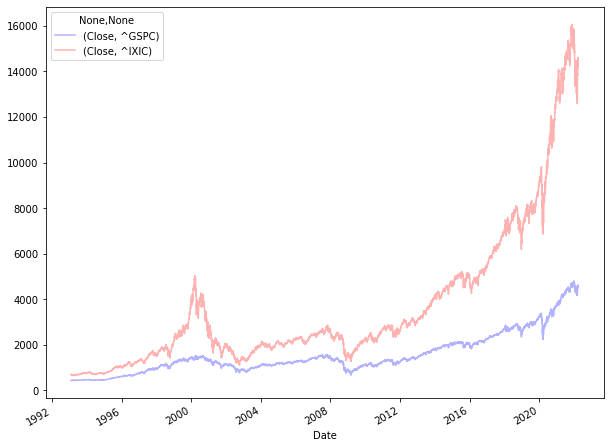

In [5]:
data_SN.iloc[:,[0,1]].plot(color = ('blue', 'red'), figsize=(10,8), alpha =0.3);

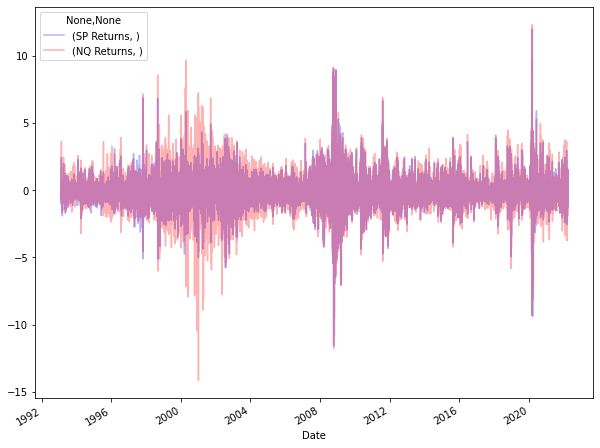

In [6]:
data_SN[['SP Returns', 'NQ Returns']].iloc[1:].plot(color = ('blue', 'red'), figsize=(10,8), alpha = 0.3);

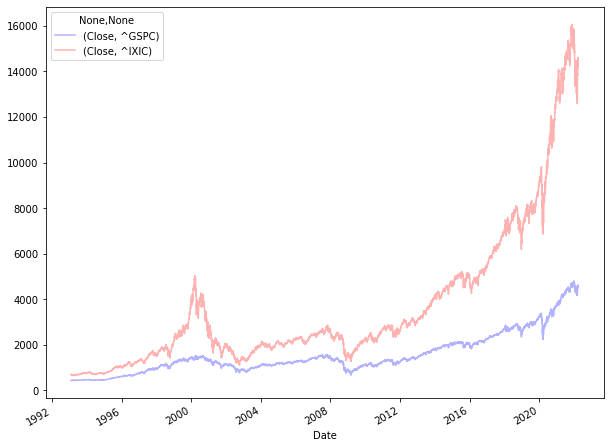

In [7]:
data_SN.iloc[:,[0,1]].plot(color = ('blue', 'red'), figsize=(10,8), alpha =0.3);

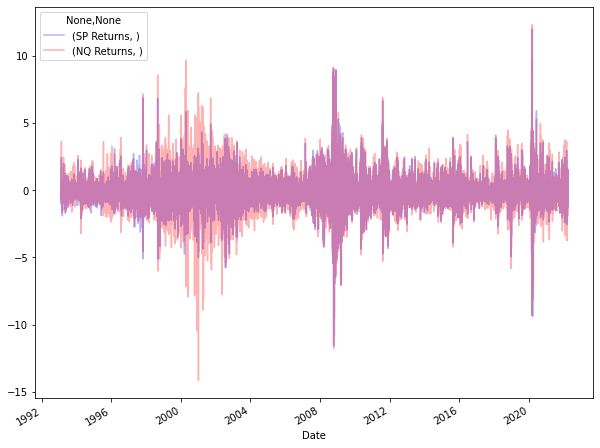

In [8]:
data_SN[['SP Returns', 'NQ Returns']].iloc[1:].plot(color = ('blue', 'red'), figsize=(10,8), alpha = 0.3);

## Let's dive deeper into the Yfinance API and and work with the data

First we will define three stocks that we want to look at more closely, and examine what sort of information we can get for each stock.  

Lets look at 
 - Twitter
 - Tesla
 - USO - an ETF (exchange traded fund) that tracks the price of oil 

In [9]:
twitter_ticker = yf.Ticker("twtr")
tesla_ticker = yf.Ticker("tsla")
uso_ticker = yf.Ticker("uso")

There is actually a lot of information that yfinance API can provide for any equity.  In the example above we only downloaded the closing price for each of the indexes. 

In [10]:
tesla_ticker.info

{'zip': '78725',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 99290,
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limited warrantie

## Out of all this info - let's extract the stock prices

This will put the dates, prices, and volumes into a *Pandas* dataframe with the name of the stock

In [11]:
twitter = twitter_ticker.history(period="max")
tesla = tesla_ticker.history(period="max")
uso = uso_ticker.history(period="max")

In [12]:
tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0
...,...,...,...,...,...,...,...
2022-11-02 00:00:00-04:00,226.039993,227.869995,214.820007,214.979996,63070300,0,0.0
2022-11-03 00:00:00-04:00,211.360001,221.199997,210.139999,215.309998,56538800,0,0.0
2022-11-04 00:00:00-04:00,222.600006,223.800003,203.080002,207.470001,98453100,0,0.0


## Now lets build a plot function 

A starting place will be to plot this information into two charts, one with the opening prices and one with volume on the Y-axis and time on the X-axis

In [13]:
def plot_stock_price_hist(ticker):
  history = ticker.history(period="max")
  x = history.index

  fig, (ax1, ax2) = plt.subplots(2, 1)
  fig.suptitle(ticker.info['symbol'] + " Stock Price and Volume")
  fig.set_size_inches(18.5, 10.5)

  ax1.plot(x, history["Open"])
  ax1.set_title("Open Price", fontsize=10)
  ax2.plot(x, history["Volume"])
  ax2.set_title("Volume", fontsize=10)

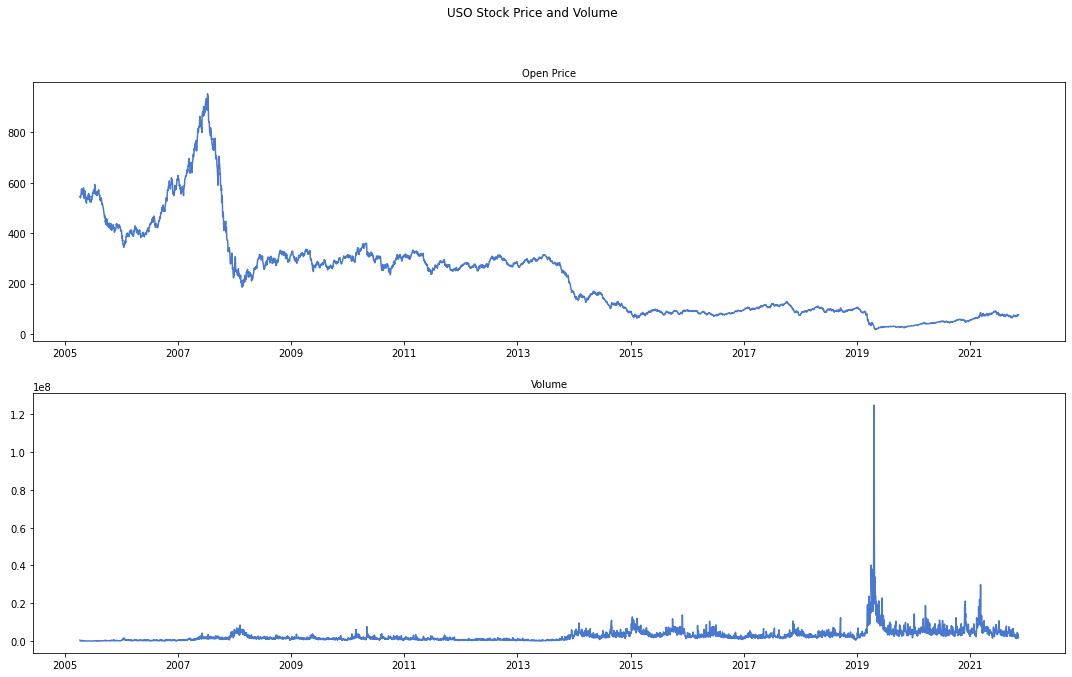

In [14]:
plot_stock_price_hist(uso_ticker)

## Let's look at the USO price 
 - what movement's can we pick up with our eyes?
 - huge run-up in commodity prices in 2008  ( kind of messes up the scale for the rest of the graph) 
 - huge volume of trades as commodity prices crashed with COVID contraction

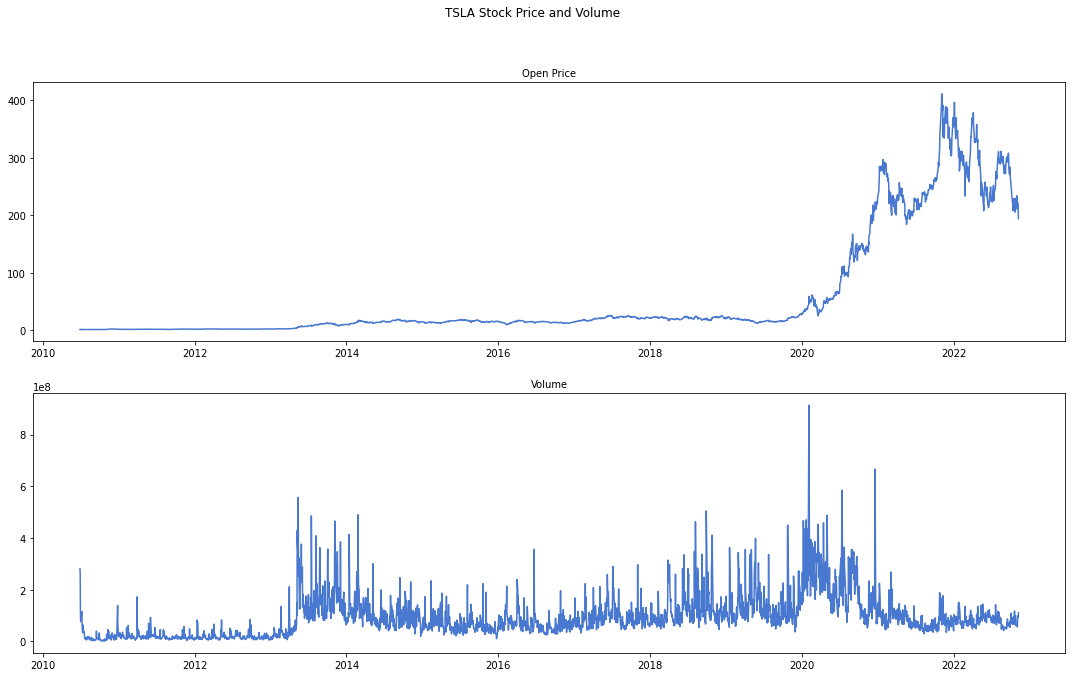

In [15]:
plot_stock_price_hist(tesla_ticker)

## Let's look at the Tesla price 
 - what movement's can we pick up with our eyes?
 - Tesla stock was constant at about $20/share into 2019 ( cant even see the movement because of scale for the last two years) 
 - huge volume of trades after 2013 but stock price doesn't seem to move up

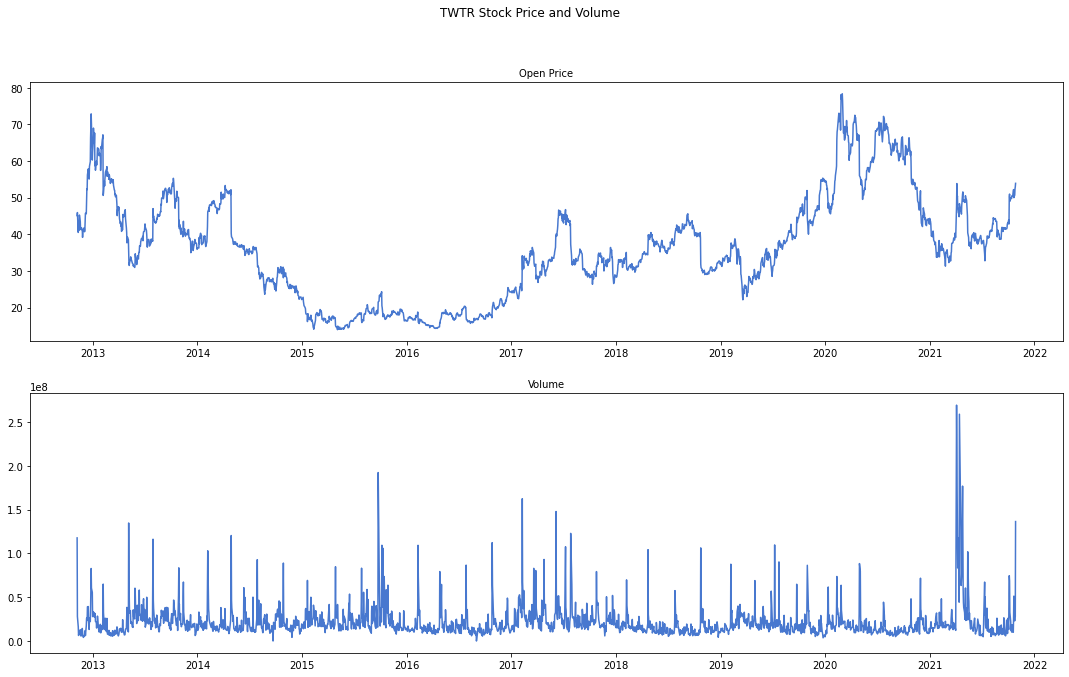

In [16]:
plot_stock_price_hist(twitter_ticker)

## Let's look at the Twitter price 
 - what movement's can we pick up with our eyes?
 - Twitter just about died in 2016 - then it picked back up !   
 - Musk's offer was for $54 / share - where does that lie on this graph?

## Acquisition of Twitter by Elon Musk

Lets looks at the Twitter and Tesla prices together - now that they are recently run by the same person

The acquisition of Twitter by Elon Musk began on April 14, 2022, and concluded on October 27, 2022

https://en.wikipedia.org/wiki/Acquisition_of_Twitter_by_Elon_Musk

In order to do this 
1) Let's narrow the time range to cover the recent period
2) Let's build a function to plot these graphs together


In [17]:
#tesla.loc[date(2022, 4, 14):date(2022, 10, 27)]
date(2022, 4, 14)

datetime.date(2022, 4, 14)

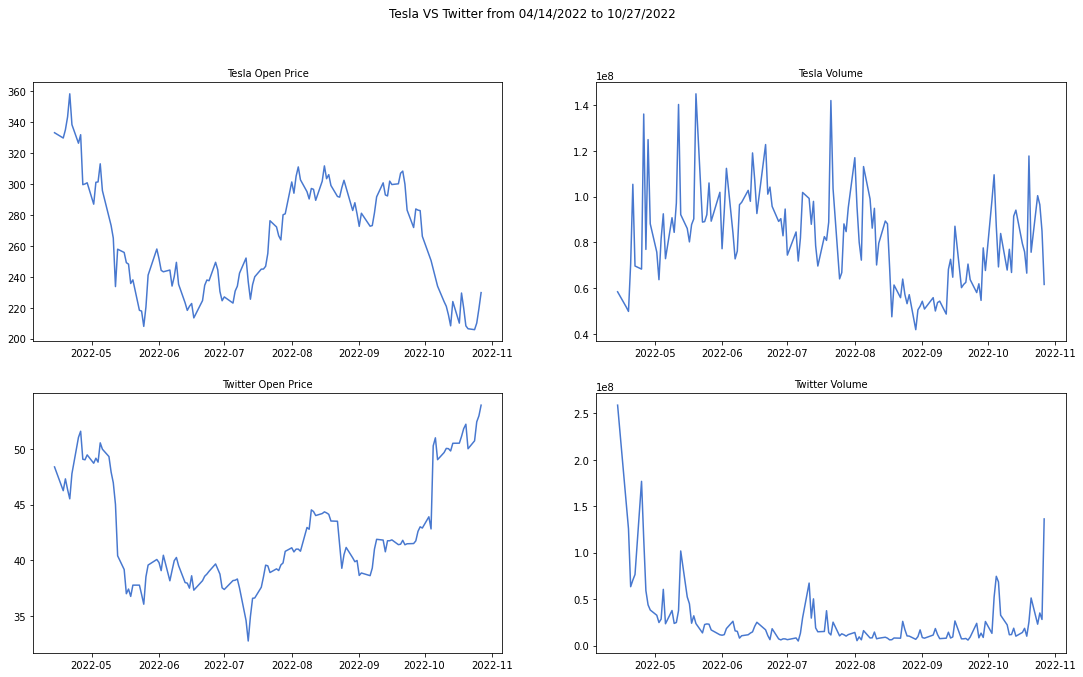

In [18]:
def tesla_twitter(date1, date2):
  tesla_2 = tesla.loc[date1:date2]
  twitter_2 = twitter.loc[date1:date2]

  tesla_index = tesla_2.index
  twitter_index = twitter_2.index

  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  fig.suptitle("Tesla VS Twitter from "+date1.strftime("%m/%d/%Y")+" to "+date2.strftime("%m/%d/%Y"))
  fig.set_size_inches(18.5, 10.5)

  ax1.plot(tesla_index, tesla_2["Open"])
  ax1.set_title("Tesla Open Price", fontsize=10)
  ax2.plot(tesla_index, tesla_2["Volume"])
  ax2.set_title("Tesla Volume", fontsize=10)
  ax3.plot(twitter_index, twitter_2["Open"])
  ax3.set_title("Twitter Open Price", fontsize=10)
  ax4.plot(twitter_index, twitter_2["Volume"])
  ax4.set_title("Twitter Volume", fontsize=10)

tesla_twitter(date(2022, 4, 14), date(2022, 10, 27))

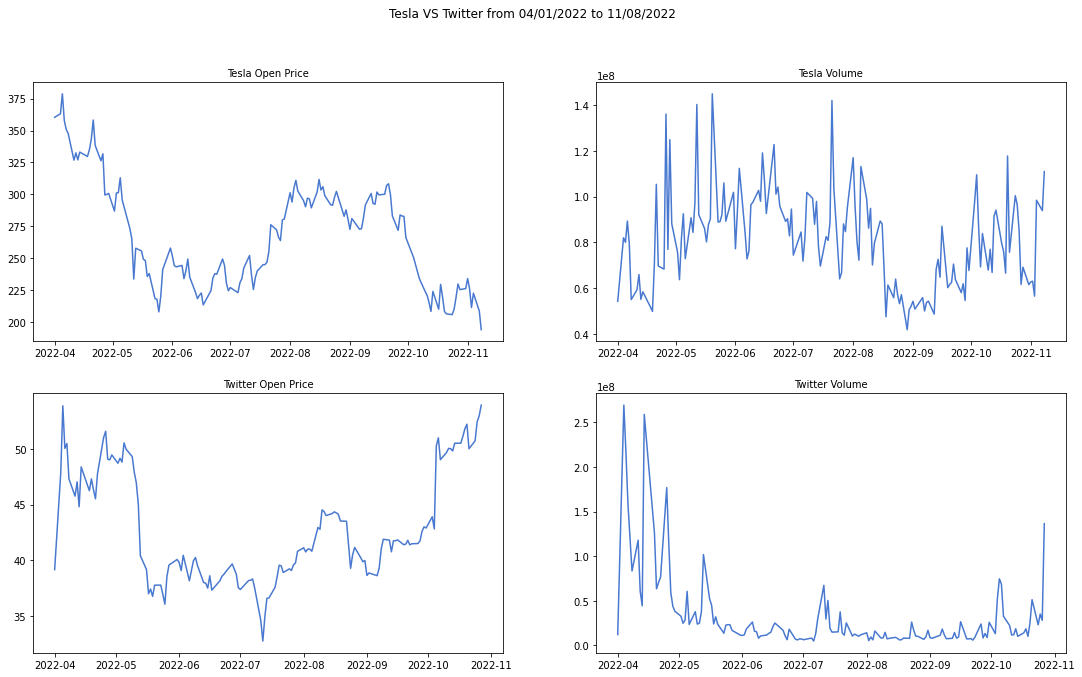

In [19]:
tesla_twitter(date(2022, 4, 1), datetime.now())

## There are some swings in prices .. 
but its hard to tell ....
 - In October Twitter price goes up as Shangai lockdwon begins to affect Tesla

## Lets look at the market for Options for Twitter 
 - This will show us the possible strike dates for different options
 - From short term - this week - to long term - in two years


In [20]:
tesla_ticker.options

('2022-11-11',
 '2022-11-18',
 '2022-11-25',
 '2022-12-02',
 '2022-12-09',
 '2022-12-16',
 '2022-12-23',
 '2023-01-20',
 '2023-02-17',
 '2023-03-17',
 '2023-04-21',
 '2023-06-16',
 '2023-09-15',
 '2024-01-19',
 '2024-03-15',
 '2024-06-21',
 '2025-01-17')

## Downloading Calls and Puts 
Let's download all of the Calls and Puts for Tesla  into two tables 

In [21]:
# Returns two table 0 : calls, 1 : puts
tesla_put , tesla_call = tesla_ticker.option_chain(tesla_ticker.options[0])
relevant_columns = ['lastPrice', 'change', 'percentChange', 'volume', 'strike']
tesla_put, tesla_call = tesla_put[relevant_columns], tesla_call[relevant_columns]
tesla_put.describe(), tesla_call.describe()

(       lastPrice     change  percentChange         volume      strike
 count  79.000000  79.000000      79.000000      79.000000   79.000000
 mean    8.018987  -1.713418     -30.540930    8525.000000  271.012658
 std    19.260305   2.819397      28.967427   19733.150208   94.493012
 min     0.010000  -9.950005     -75.000000       1.000000  100.000000
 25%     0.010000  -2.605000     -61.694003      20.500000  201.250000
 50%     0.030000  -0.040000     -24.435930     324.000000  250.000000
 75%     2.095000   0.000000       0.000000    6489.500000  342.500000
 max    89.700000   0.000000       0.000000  123155.000000  480.000000,
         lastPrice     change  percentChange         volume      strike
 count   62.000000  62.000000      62.000000      62.000000   62.000000
 mean    50.475968   3.817903      18.988259   10532.919355  233.467742
 std     49.418400   3.325757      19.774576   23843.904797   65.769959
 min      0.010000  -0.010000     -33.333336       1.000000  100.000000


## Let's put these together into a joint table that are joined by the strike price

In [22]:
tesla_option = pd.merge(tesla_put, tesla_call, how='inner', on = "strike")
#tesla_option = pd.merge(tesla_put, tesla_call, how='outer', on = "strike")
tesla_option[12:32]

,lastPrice_x,change_x,percentChange_x,volume_x,strike,lastPrice_y,change_y,percentChange_y,volume_y
12,13.35,-5.18,-27.954668,7404,180.0,1.95,0.660000,51.162796,98924
13,9.31,-5.11,-35.436890,9038,185.0,3.30,1.100000,49.999992,79203
14,8.07,-4.46,-35.594574,12916,187.5,4.20,1.430000,51.624542,52248
15,6.65,-4.05,-37.850468,65776,190.0,5.20,1.700000,48.571423,121510
16,5.35,-3.85,-41.847828,32012,192.5,6.55,2.130000,48.190050,41352
17,4.24,-3.46,-44.935066,73670,195.0,8.06,2.560000,46.545460,32592
18,3.15,-3.25,-50.781250,35986,197.5,9.60,3.000001,45.454556,7725
19,2.45,-2.75,-52.884613,123155,200.0,11.45,3.470000,43.483707,18883
20,1.74,-2.46,-58.571426,21538,202.5,13.25,3.800000,40.211643,3439
21,1.28,-2.07,-61.791046,39355,205.0,15.05,3.900001,34.977585,5098


## Now lets code up a graph of the puts and calls for Tesla

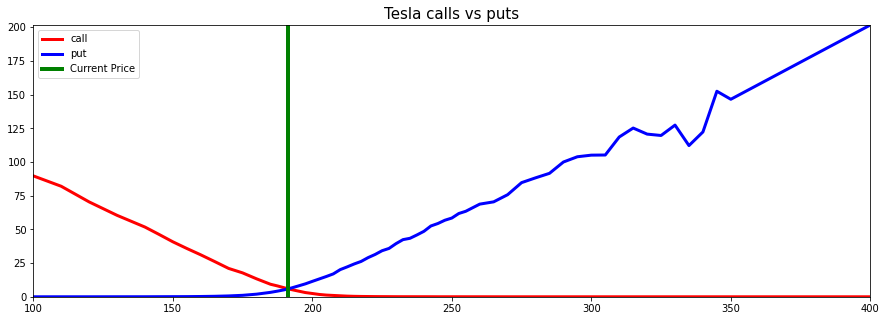

In [23]:
current_tesla_p = tesla.iloc[-1]['Close']
current_tesla_p

plt.figure().set_size_inches(15, 5)

plt.title("Tesla calls vs puts",  fontsize=15)

plt.plot(tesla_option['strike'], tesla_option['lastPrice_x'], color='r', label='call', linewidth=3)
plt.plot(tesla_option['strike'], tesla_option['lastPrice_y'], color='b', label='put', linewidth=3)
plt.axvline(x = current_tesla_p, color = 'g', label = 'Current Price', linewidth=4) #Current Price

plt.axis([tesla_option['strike'].iloc[0], tesla_option['strike'].iloc[-1], 0, max(max(tesla_option['lastPrice_x']), max(tesla_option['lastPrice_y']))])
plt.legend()

In [24]:
def option(ticker):
  put, call = ticker.option_chain(ticker.options[0])
  relevant_columns = ['lastPrice', 'change', 'percentChange', 'volume', 'strike']
  put, call = put[relevant_columns], call[relevant_columns]
  option_sheet = pd.merge(put, call, how='inner', on = "strike")
  return option_sheet

option(uso_ticker)

,lastPrice_x,change_x,percentChange_x,volume_x,strike,lastPrice_y,change_y,percentChange_y,volume_y
0,20.95,0.00,0.000000,4,50.0,0.11,0.00,0.000000,10.0
1,17.00,0.00,0.000000,1,55.0,0.01,0.00,0.000000,118.0
2,16.94,0.00,0.000000,2,60.0,0.31,0.00,0.000000,3.0
3,13.55,0.00,0.000000,1,63.0,0.04,0.00,0.000000,1.0
4,8.96,0.00,0.000000,1,64.5,0.08,0.03,59.999996,12.0
5,11.40,0.00,0.000000,3,65.0,0.01,-0.01,-50.000000,39.0
6,5.90,0.00,0.000000,2,65.5,0.09,0.03,50.000010,12.0
7,10.80,0.00,0.000000,4,66.0,0.02,0.00,0.000000,56.0
8,7.00,0.00,0.000000,3,66.5,0.11,0.00,0.000000,6.0
9,4.73,0.00,0.000000,5,67.0,0.03,0.00,0.000000,4.0


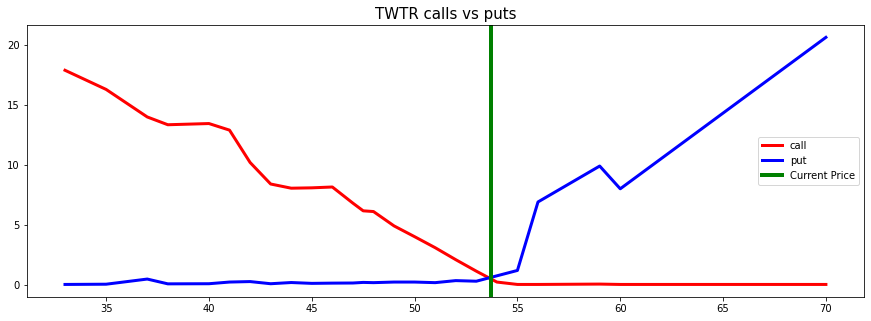

In [25]:
def option_graph(ticker):
  option_sheet = option(ticker)

  current_price = ticker.history().iloc[-1]['Close']

  plt.figure().set_size_inches(15, 5)

  plt.title(ticker.info['symbol'] + " calls vs puts",  fontsize=15)

  plt.plot(option_sheet['strike'], option_sheet['lastPrice_x'], color='r', label='call', linewidth=3)
  plt.plot(option_sheet['strike'], option_sheet['lastPrice_y'], color='b', label='put', linewidth=3)
  plt.axvline(x = current_price, color = 'g', label = 'Current Price', linewidth=4) #Current Price

  #plt.axis([option_sheet['strike'].iloc[0], option_sheet['strike'].iloc[-1], 0, max(max(option_sheet['lastPrice_x']), max(option_sheet['lastPrice_y']))])
  plt.legend()

option_graph(twitter_ticker)

## QuantStats Package
The same developer made a more recent package that draws on Yfinance but makes a whole set of summary tables 

Check out the documentation for the [QuantStats Package](https://pypi.org/project/QuantStats/)

In [26]:
try:
    import quantstats as qs
except:
    !pip install quantstats
    import quantstats as qs

In [27]:
import quantstats as qs

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

# fetch the daily returns for a stock
stock = qs.utils.download_returns('TSLA')

# show sharpe ratio
qs.stats.sharpe(stock)

# or using extend_pandas() :)
stock.sharpe()

0.96464913516736217

### QuantStats can make a "Snapshot" of stock performance

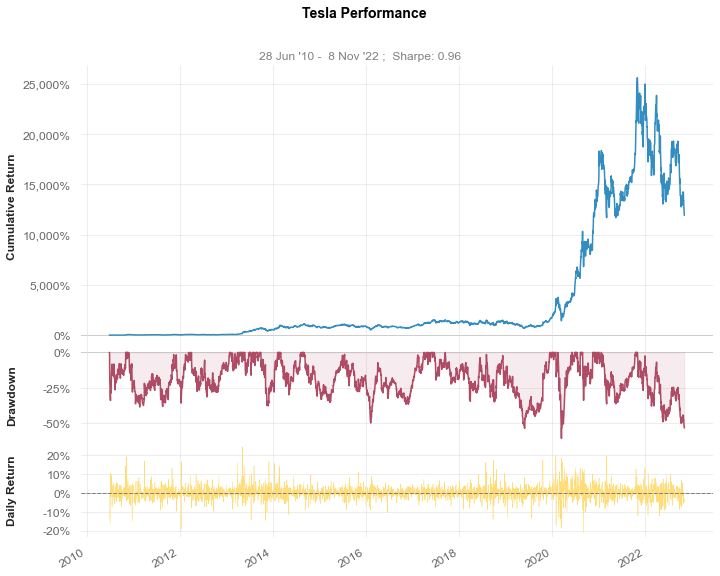

In [28]:
qs.plots.snapshot(stock, title='Tesla Performance')

## Relevant materials and sources

https://algotrading101.com/learn/yfinance-guide/ <br>
https://pypi.org/ <br>
https://pypi.org/project/QuantStats/